# PCA: Principal Component Analysis

- Comprarar casa o alquilar casa?

### Importamos librerias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

### Cargamos datos de entrada

In [27]:
datos = pd.read_csv("comprar_alquilar.csv")
datos
# REFERENCIAS:
# ingresos y gastos son mensuales de 1 personas o 2 si están casados.
# trabajo: 0-sin trabajo 1-autonomo 2-asalariado 3-empresario 4-Autonomos 5-Asalariados 6-Autonomo y Asalariado 7-Empresario y Autonomo 8 Empresarios o empresario y autónomo
# estado_civil: 0-soltero 1-casado 2-divorciado
# hijos: Cantidad de hijos menores (no trabajan)
# comprar: 0-mejor alquilar 1-Comprar casa
# hipoteca fija a 30 años con interes

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [30]:
datos.columns


Index(['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros',
       'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar'],
      dtype='object')

### Visualicemos las dimensiones

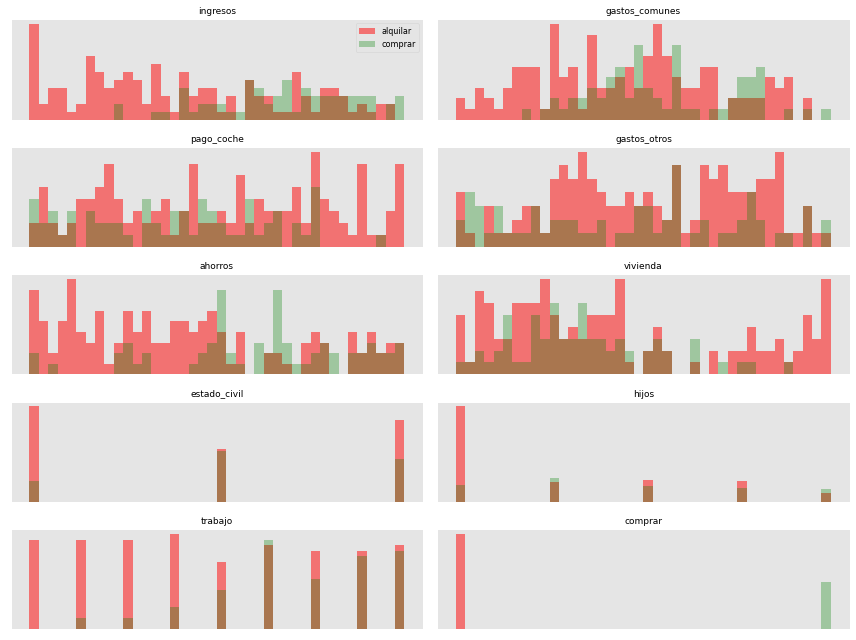

In [7]:
fig,axes =plt.subplots(5,2, figsize=(12, 9)) # 2 columnas cada una con 5 figuras, total 10 features
alquilar=datos[datos['comprar']==0] # conviene alquilar casa
comprar=datos[datos['comprar']==1] # conviene comprar casa
ax=axes.ravel()
for i in range(len(datos.columns)):
  _,bins=np.histogram(datos[datos.columns[i]],bins=40)
  ax[i].hist(alquilar.values[:,i],bins=bins,color='r',alpha=.5)# rojo alquilar
  ax[i].hist(comprar.values[:,i],bins=bins,color='g',alpha=0.3)# verde comprar
  ax[i].set_title(datos.columns[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False)
  ax[i].set_yticks(())
ax[0].legend(['alquilar','comprar'],loc='best',fontsize=8)
plt.tight_layout()
plt.show()

### Ejemplo de como se correlacionan

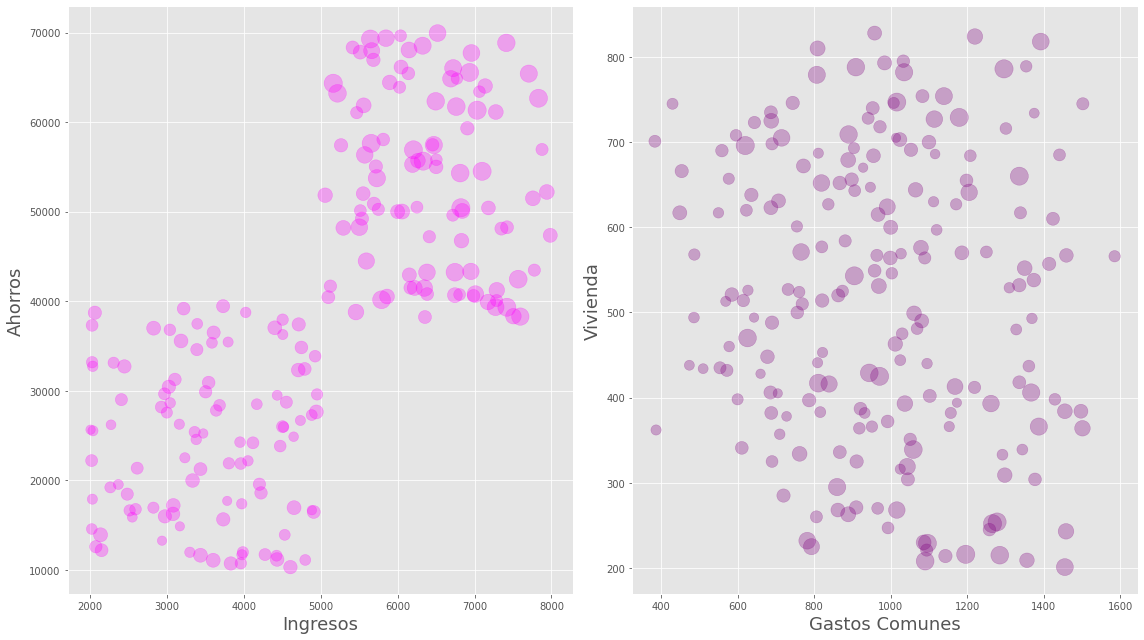

In [8]:
plt.subplot(1,2,1)#fisrt plot
plt.scatter(datos['ingresos'], datos['ahorros'], s=datos['vivienda']*0.0005, color='magenta', label='check', alpha=0.3)
plt.xlabel('Ingresos',fontsize=18)
plt.ylabel('Ahorros',fontsize=18)
plt.subplot(1,2,2)# 2nd plot
plt.scatter(datos['gastos_comunes'], datos['gastos_otros'], s=datos['vivienda']*0.0005, color='purple', label='check', alpha=0.3)
plt.xlabel('Gastos Comunes',fontsize=18)
plt.ylabel('Vivienda',fontsize=18)
plt.tight_layout()
plt.show()

## Vamos a Normalizar/Estandalizar los datos

In [15]:
scaler=StandardScaler()#instantiate     
datos1 = datos.drop(['comprar'], axis=1) #quitar la clase
scaler.fit(datos1) # calcula la media y estandar para cada dimension #entrenabamos 
X_scaled=scaler.transform(datos1)# transforma los datos a su nueva escala

In [16]:
X_scaled

array([[ 0.62012866,  0.10468863, -1.69895439, ..., -1.22708822,
         0.5623736 , -0.98441983],
       [ 1.0639266 , -0.10162457, -0.71204191, ..., -0.02963981,
         1.29527339,  0.59691461],
       [ 0.89117304,  0.22626604, -0.91263388, ...,  1.1678086 ,
        -0.17052619,  1.38758182],
       ...,
       [-1.05736798, -0.06109876,  0.51558094, ..., -0.02963981,
         1.29527339,  1.38758182],
       [-0.96801269, -0.38530521,  1.26178306, ..., -0.02963981,
         0.5623736 ,  0.201581  ],
       [-0.57842363,  0.68310241, -0.85646812, ..., -1.22708822,
        -0.90342598, -0.19375261]])

## Aplicamos PCA

In [17]:
pca=PCA(n_components=9) #9= numero de variables
#pca=PCA(.85)
pca.fit(X_scaled) # buscar los componentes principales
X_pca=pca.transform(X_scaled) 
#revisemos la forma del array
print("shape of X_pca", X_pca.shape)    

shape of X_pca (202, 9)


### Veamos cuán buenos predictores son las nuevas dimensiones

In [18]:
#expl = pca.explained_variance_ratio_
#print(expl)
#print('suma:',sum(expl[0:5]))
#con 5 componentes tenemos algo mas del 85% de varianza explicada

### graficamos la variacion explicada acumulada

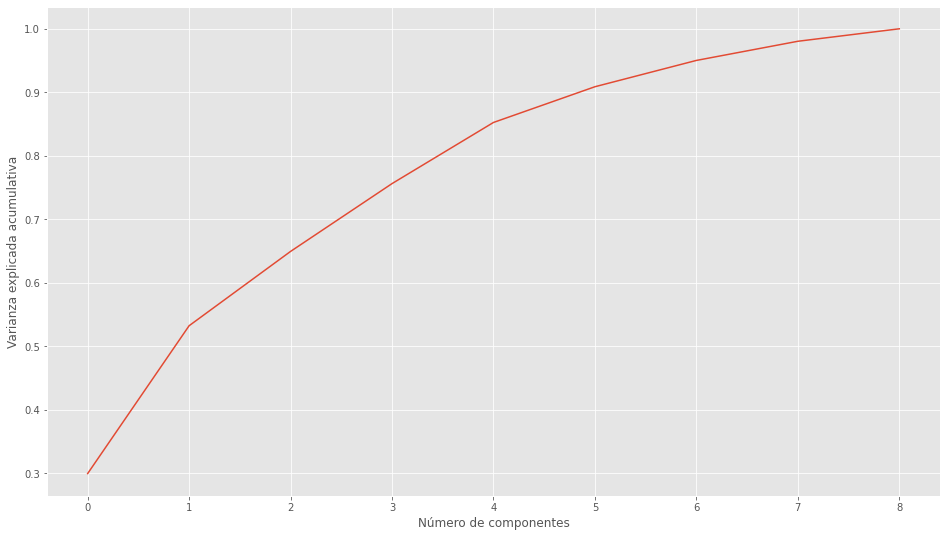

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulativa')
plt.show()

## Graficamos los 2 componentes principales

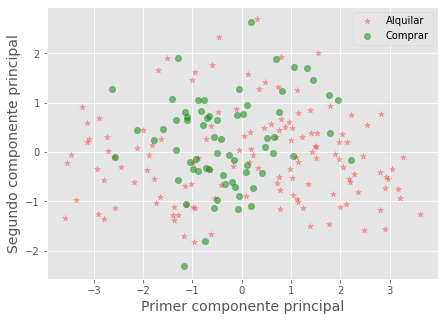

In [23]:
Xax=X_pca[:,0]
Yax=X_pca[:,4]
labels=datos['comprar'].values
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

plt.xlabel("Primer componente principal",fontsize=14)
plt.ylabel("Segundo componente principal",fontsize=14)
plt.legend()
plt.show()

# compruebe el diagrama de dispersión del componente restante y verá y comprenderá la diferencia

In [32]:
dataPCA = pd.DataFrame (X_pca, columns = ['comp1','comp2','comp3','comp4','comp5','comp6','comp7','comp8','comp9'])

In [33]:
dataPCA

,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9
0,-1.321915,-0.222950,-1.599863,-0.885014,0.646617,-0.700208,-0.318031,0.751809,0.269984
1,-1.147878,1.716967,-0.395722,-0.447960,-0.687805,-0.231969,-1.542487,-0.221799,0.438425
2,-0.090369,1.836066,-1.359382,0.337505,0.742387,0.593030,1.540495,-0.668120,0.153463
3,-3.455898,-0.078279,0.202382,-1.573584,-0.068551,-0.051945,-0.909409,-0.684486,-0.129045
4,-0.916933,-1.184676,-0.190036,0.117804,-0.147753,-0.619750,0.450419,-0.194341,0.687452
...,...,...,...,...,...,...,...,...,...
197,0.707036,-2.506168,0.430903,0.583919,-0.620195,-0.205709,-0.728973,-0.244936,0.640035
198,2.038917,1.378909,0.824921,0.039240,0.373044,0.013360,-0.401364,-0.106836,-0.076905
199,1.481464,0.975900,-0.637578,0.884946,0.128337,-0.655749,-0.662248,-0.437755,-0.796369
200,1.514633,-0.392176,-0.005710,1.308566,-0.114526,-0.056951,-0.820040,-0.055710,-0.143768


### Veamos la correlacion entre las nuevas componentes y las dimensiones originales

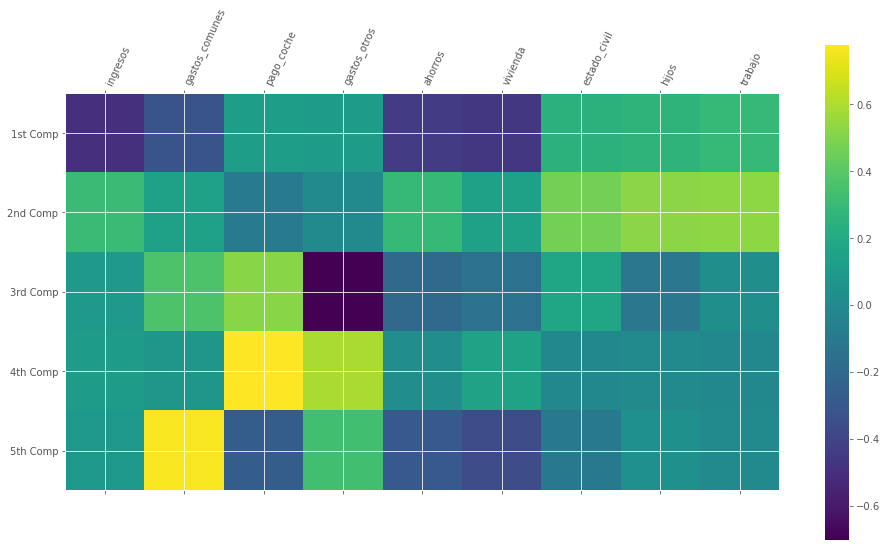

In [63]:
#plt.figure(figsize=(0, 1))
plt.matshow(pca.components_[0:5],cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')
#plt.tight_layout()
plt.show()# 

In [69]:
components = pd.DataFrame(pca.components_, columns = datos1.columns)
components

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo
0,-0.493720,-0.318229,0.123771,0.111876,-0.444650,-0.462609,0.252279,0.259859,0.290248
1,0.306959,0.147373,-0.091641,0.000112,0.288435,0.148985,0.469044,0.521894,0.527156
2,0.091419,0.363453,0.516144,-0.701986,-0.191767,-0.140513,0.172885,-0.112184,0.036910
3,0.111222,0.081630,0.780268,0.590704,0.022839,0.150085,-0.007663,0.007404,-0.007493
4,0.088897,0.763006,-0.265554,0.330744,-0.289002,-0.365556,-0.104639,0.043668,0.000009
5,-0.075477,0.067903,-0.153697,0.154422,-0.230181,0.290799,0.767070,-0.387964,-0.256446
6,0.154319,-0.105598,0.027333,0.101876,0.524584,-0.641034,0.212365,-0.460067,0.105053
7,0.012732,-0.010274,0.061759,-0.037977,0.212759,-0.260847,0.204816,0.532216,-0.745630
8,0.776990,-0.374440,-0.048557,0.026631,-0.474168,-0.156101,-0.003289,0.011051,-0.060657


## Preparo nuevas entradas para validar el algoritmo

In [71]:
# Split dataset in training and test datasets
dfScaledPca = pd.DataFrame(X_pca, columns = df.columns)
dfScaledPca["comprar"]=datos["comprar"]
print (dfScaledPca.head())
print(dfScaledPca.shape)
X_train, X_test = train_test_split(dfScaledPca, test_size=0.2, random_state=4) #6 
y_train =X_train["comprar"]
y_test = X_test["comprar"]
X_train = X_train.drop(['comprar'], axis=1)
X_test = X_test.drop(['comprar'], axis=1)

   ingresos  gastos_comunes  pago_coche  gastos_otros   ahorros  vivienda  \
0 -1.321915       -0.222950   -1.599863     -0.885014  0.646617 -0.700208   
1 -1.147878        1.716967   -0.395722     -0.447960 -0.687805 -0.231969   
2 -0.090369        1.836066   -1.359382      0.337505  0.742387  0.593030   
3 -3.455898       -0.078279    0.202382     -1.573584 -0.068551 -0.051945   
4 -0.916933       -1.184676   -0.190036      0.117804 -0.147753 -0.619750   

   estado_civil     hijos   trabajo  comprar  
0     -0.318031  0.751809  0.269984        1  
1     -1.542487 -0.221799  0.438425        0  
2      1.540495 -0.668120  0.153463        1  
3     -0.909409 -0.684486 -0.129045        0  
4      0.450419 -0.194341  0.687452        1  
(202, 10)


## Prediccion con Gaussian Naive Bayes

### Con datos de entrada con reducción de dimensiones por PCA

In [72]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train.values,
    y_train
)
y_pred = gnb.predict(X_test)

## Resultados Obtenidos

In [73]:
print('Precisión en el set de Entrenamiento: {:.2f}'
     .format(gnb.score(X_train, y_train))) #batir  87
print('Precisión en el set de Test: {:.2f}'
     .format(gnb.score(X_test, y_test)))  #batir  90

Precisión en el set de Entrenamiento: 0.93
Precisión en el set de Test: 0.90


In [74]:
# Print Test results
print("Total de Muestras en Test: {}\nFallos: {}"
      .format(
          X_test.shape[0],
          (y_test != y_pred).sum()
))

Total de Muestras en Test: 41
Fallos: 4


In [75]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[28  2]
 [ 2  9]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        30
           1       0.82      0.82      0.82        11

    accuracy                           0.90        41
   macro avg       0.88      0.88      0.88        41
weighted avg       0.90      0.90      0.90        41



### Comprobamos con predicciones individuales

In [76]:
X_scaledTest=scaler.transform([[6830,1298,345,309,46761,429812,1,1,5], # 1
                               [4054,1095,371,440,22183,223971,1,0,3], # 0
                               [6455,1033,98,795,57463,321779,2,1,8], # 1
                               [6470,1035,39,782,57439,606291,0,0,1] #0
                    ])
X_pcaTest=pca.transform(X_scaledTest) 
#print(X_pcaTest)
print(gnb.predict(X_pcaTest))

[1 0 1 0]
